# Final Project
# Class: DSC 630
# Name: Wittlieff, Harlan
# Date: 5/12/2022

## Load the datasets

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load datasets
df_red = pd.read_csv('Data/winequality-red.csv', sep=';')
df_white = pd.read_csv('Data/winequality-white.csv', sep=';')

In [3]:
# View df_red
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# View df_white
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Preparation

In [5]:
# Check for null values in the red df
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Check for null values in the white df
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Neither dataset contains null values.

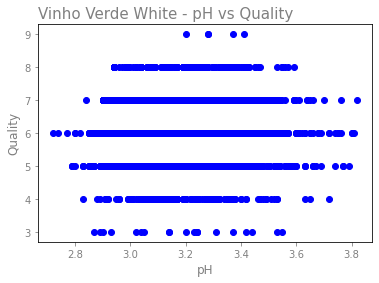

In [7]:
# Create a scatter plot of residual sugar vs quality
plt.scatter(df_white['pH'], df_white['quality'], color='b')
plt.title('Vinho Verde White - pH vs Quality', loc='left', fontsize=15, color='grey')
plt.xlabel('pH', fontsize=12, color='grey')
plt.ylabel('Quality', fontsize=12, color='grey')
plt.tick_params(axis='x', colors='grey')
plt.tick_params(axis='y', colors='grey')
plt.show()

In [8]:
# Get quality occurances for the white df
df_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
# Get quality occurances for the red df
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Since this study is primarily concerned with identifying high quality wines, the quality metric will be converted into a binary field for High and Poor

In [10]:
# Recode Quality in white df(<6 = Poor, 6< = High)
df_white['quality'] = df_white['quality'].replace([3, 4, 5, 6, 7, 8, 9], 
                                                  ['Poor', 'Poor', 'Poor', 'Poor', 'High', 'High', 'High'])

In [11]:
# Check quality values
df_white['quality'].value_counts()

Poor    3838
High    1060
Name: quality, dtype: int64

In [12]:
# Recode Quality in red df(<6 = Poor, 6< = High)
df_red['quality'] = df_red['quality'].replace([3, 4, 5, 6, 7, 8, 9], 
                                                  ['Poor', 'Poor', 'Poor', 'Poor', 'High', 'High', 'High'])

In [13]:
# Check quality values
df_red['quality'].value_counts()

Poor    1382
High     217
Name: quality, dtype: int64

### Oversampling with SMOTE - Red

Both the red and white datasets are in balanced in terms of quality. To accomodate this issue the datasets will be oversampled with SMOTE.

In [15]:
# Load libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [16]:
# Split into independent & dependent variables
x_red = df_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_red = df_red['quality']

In [17]:
# Create training & test datasets
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_red, y_red, test_size = 0.2)

In [18]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train_red))

Before oversampling:  Counter({'Poor': 1112, 'High': 167})


In [19]:
# define oversampling strategy
SMOTE = SMOTE()

In [24]:
# fit and apply the transform
x_train_red_SMOTE, y_train_red_SMOTE = SMOTE.fit_resample(x_train_red, y_train_red)

In [25]:
# summarize class distribution
print("After oversampling: ",Counter(y_train_red_SMOTE))

After oversampling:  Counter({'Poor': 1112, 'High': 1112})


### Oversampling with SMOTE - White

In [40]:
# Split into independent & dependent variables
x_white = df_white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_white = df_white['quality']

In [41]:
# Create training & test datasets
x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(x_white, y_white, test_size = 0.2)

In [42]:
# fit and apply the transform
x_train_white_SMOTE, y_train_white_SMOTE = SMOTE.fit_resample(x_train_white, y_train_white)

In [43]:
# summarize class distribution
print("After oversampling: ",Counter(y_train_white_SMOTE))

After oversampling:  Counter({'Poor': 3078, 'High': 3078})


# Building the model - Reds

In [26]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
x_train_red_s = standardizer.fit_transform(x_train_red_SMOTE)
x_test_red_s = standardizer.transform(x_test_red)

# Create a KNN classifier
knn_r = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)

# Create a pipeline
pipe_r = Pipeline([("standardizer", standardizer), ("knn", knn_r)])

In [27]:
# Fit the pipeline
pipe_r.fit(x_train_red_s, y_train_red_SMOTE)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=4))])

In [28]:
# Build predictions
pipe_pred_red = pipe_r.predict(x_test_red_s)

# Calculate accuracy
accuracy_score(y_test_red, pipe_pred_red)

0.809375

The first model is 81% accurate. Next additional values for the number of neighbors will be explored

In [29]:
# Create a search space for the number of neighbors
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                     18, 19, 20, 21, 22, 23, 24, 25]}]

In [30]:
# Create grid search
classifier_r = GridSearchCV(pipe_r, search_space, cv=5, verbose=0).fit(x_train_red_s, y_train_red_SMOTE)

In [31]:
# Find the best value
classifier_r.best_estimator_.get_params()["knn__n_neighbors"]

1

In [33]:
# Build predictions
classifier_pred_r = classifier_r.predict(x_test_red_s)

# Calculate accuracy
accuracy_score(y_test_red, classifier_pred_r)

0.88125

The change in the number of neighbors increased the accuracy to 88%

[Text(0, 0.5, 'High'), Text(0, 1.5, 'Poor')]

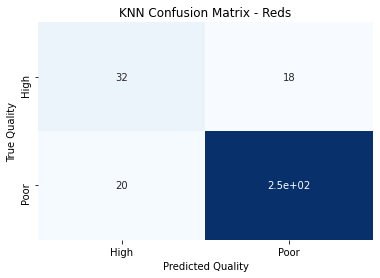

In [36]:
# Create confusion matrix
matrix_r = confusion_matrix(y_test_red, classifier_pred_r)

# Create pandas dataframe
c_df_r = pd.DataFrame(matrix_r)

# Create heatmap
ax= plt.subplot()
sns.heatmap(c_df_r, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("KNN Confusion Matrix - Reds")
ax.set_ylabel("True Quality"), ax.set_xlabel("Predicted Quality")
ax.xaxis.set_ticklabels(['High', 'Poor']); ax.yaxis.set_ticklabels(['High', 'Poor'])

The KNN model successfully identified 32 high quality wines. Unfortunately it missed 18 high quality wines and missclassified 20. 

In [37]:
# Build Random Forest Model
rf_red = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model on training data
rf_red.fit(x_train_red_SMOTE, y_train_red_SMOTE)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [38]:
# Build predictions
rf_pred_red = rf_red.predict(x_test_red)

# Calculate accuracy
accuracy_score(y_test_red, rf_pred_red)

0.8875

[Text(0, 0.5, 'High'), Text(0, 1.5, 'Poor')]

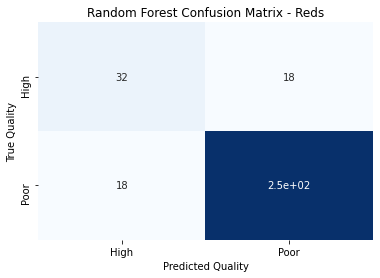

In [39]:
# Create confusion matrix
rf_matrix_r = confusion_matrix(y_test_red, rf_pred_red)

# Create pandas dataframe
rf_c_df_red = pd.DataFrame(rf_matrix_r)

# Create heatmap
ax= plt.subplot()
sns.heatmap(rf_c_df_red, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("Random Forest Confusion Matrix - Reds")
ax.set_ylabel("True Quality"), ax.set_xlabel("Predicted Quality")
ax.xaxis.set_ticklabels(['High', 'Poor']); ax.yaxis.set_ticklabels(['High', 'Poor'])

The random forest model successfully identified 32/50 of the high quality wines. It missclassified fewer (18) poor quality wines as highquality when compared to the KNN model.

# Building the model - Whites

In [44]:
# Build Random Forest Model
rf_white = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model on training data
rf_white.fit(x_train_white_SMOTE, y_train_white_SMOTE)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [45]:
# Build predictions
rf_pred_white = rf_white.predict(x_test_white)

# Calculate accuracy
accuracy_score(y_test_white, rf_pred_white)

0.8744897959183674

[Text(0, 0.5, 'High'), Text(0, 1.5, 'Poor')]

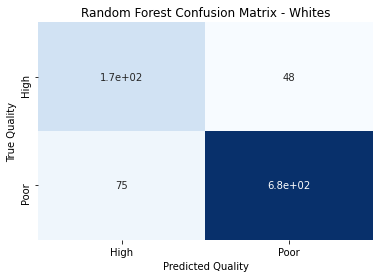

In [46]:
# Create confusion matrix
rf_matrix_w = confusion_matrix(y_test_white, rf_pred_white)

# Create pandas dataframe
rf_c_df_white = pd.DataFrame(rf_matrix_w)

# Create heatmap
ax= plt.subplot()
sns.heatmap(rf_c_df_white, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("Random Forest Confusion Matrix - Whites")
ax.set_ylabel("True Quality"), ax.set_xlabel("Predicted Quality")
ax.xaxis.set_ticklabels(['High', 'Poor']); ax.yaxis.set_ticklabels(['High', 'Poor'])